In [2]:
# Example of graph creation - bank loan example, and inspecting the graph..
# pip install networkx

from py_expression_eval import Parser # Not used at the moment but might be good !
parser = Parser()
import copy
import networkx

# Examples of node creation
class BranchNode():  # Just an example of a base class
    def __init__(self, name : str, condition : str):
        self.expression = Parser().parse(condition)
        self.valuesAndNext : Dict[str, str] = {} # A dictionary from expression value to next branch
        self.name = name
        
    def getVariables(self):
        return self.expression.variables()
    
    def __str__(self):
        return self.name + " " + str(self.expression)
        

A = BranchNode('loanTest1', 'loan < 1000')
B = BranchNode('loanTest2', 'loan >= 1000 and loan <= 1000')
C = BranchNode('termTest', 'term < 5')

print("An example of accessing the variables inside the nodes...")
print(str(A.getVariables()))

print(A)


import networkx as nx
graph = nx.DiGraph()
graph.clear()
graph.graph['modelName'] = "Bank Loan"

graph.add_node(A)
graph.add_node(B)
graph.add_node(C)

graph.add_edge(A,B)
graph.add_edge(A,C)
graph.add_edge(B,C)


def debugInspectGraph():
    print("Graph nodes: ")
    for node in graph.nodes:
        print(node)

    print("Graph edges: ")
    for edge in graph.edges:
        start = edge[0]
        end = edge[1]
        print(f"start from {start.name} end {end.name}")

    print("In Degrees: ", graph.in_degree([node for node in graph.nodes]))
    print("Out Degrees: ", graph.out_degree([node for node in graph.nodes]))
    
debugInspectGraph()

An example of accessing the variables inside the nodes...
['loan']
loanTest1 (loan<1000)
Graph nodes: 
loanTest1 (loan<1000)
loanTest2 ((loan>=1000)and(loan<=1000))
termTest (term<5)
Graph edges: 
start from loanTest1 end loanTest2
start from loanTest1 end termTest
start from loanTest2 end termTest
In Degrees:  [(<__main__.BranchNode object at 0x7fe052b71be0>, 0), (<__main__.BranchNode object at 0x7fe052bb6518>, 1), (<__main__.BranchNode object at 0x7fe0536d3d68>, 2)]
Out Degrees:  [(<__main__.BranchNode object at 0x7fe052b71be0>, 2), (<__main__.BranchNode object at 0x7fe052bb6518>, 1), (<__main__.BranchNode object at 0x7fe0536d3d68>, 0)]


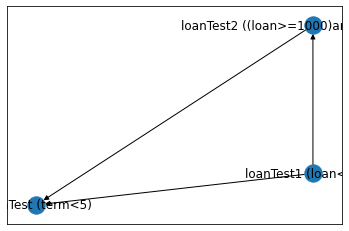

In [9]:
import matplotlib as plt
G = nx.dodecahedral_graph()
nx.draw_networkx(graph)
#nx.draw(graph, pos=nx.spring_layout(graph))  # use spring layout
plt.pyplot.show()